<a href="https://colab.research.google.com/github/mcfatbeard57/Hands-On-ML-Tensor-FLow/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 5 SVM

# SVM Classification
capable of performing linear or nonlinear classification, regression, and even
outlier detection.

## Linear SVM classification

### Large margin classification

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Notice that adding more training instances “off the street” will not affect the decision
boundary at all:

**SVMs are sensitive to the feature scales**

### Soft Margin Classification

In [ ]:
# The objective is to
# find a good balance between keeping the street as large as possible and limiting the
# margin violations (i.e., instances that end up in the middle of the street or even on the
# wrong side)

**control this balance using the C hyperparameter**

***If your SVM model is overfitting, you can try regularizing it by
reducing C.***

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Unlike Logistic Regression classifiers, SVM classifiers do not output
probabilities for each class.

## NonLinear SVM classification

In [ ]:
 # using polynomial features

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
))
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

### Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

if your model is **overfitting**, you might want to reduce the polynomial degree. Conversely, if it is **underfitting**, you can try increasing it. 

The** hyperparameter coef0** controls how much the model is influenced by highdegree polynomials versus low-degree polynomials.

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

In [ ]:
# use grid search to find the right hyperparameter values

## Gaussian RBF Kernel

In [ ]:
rbf_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

### hyperparameters gamma (γ) and C.

Increasing
gamma makes the bell-shape curve narrower (see the left plot of Figure 5-8), and as a
result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. Conversely, a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influence,
and the decision boundary ends up smoother. So γ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting,
you should increase it (similar to the C hyperparameter).

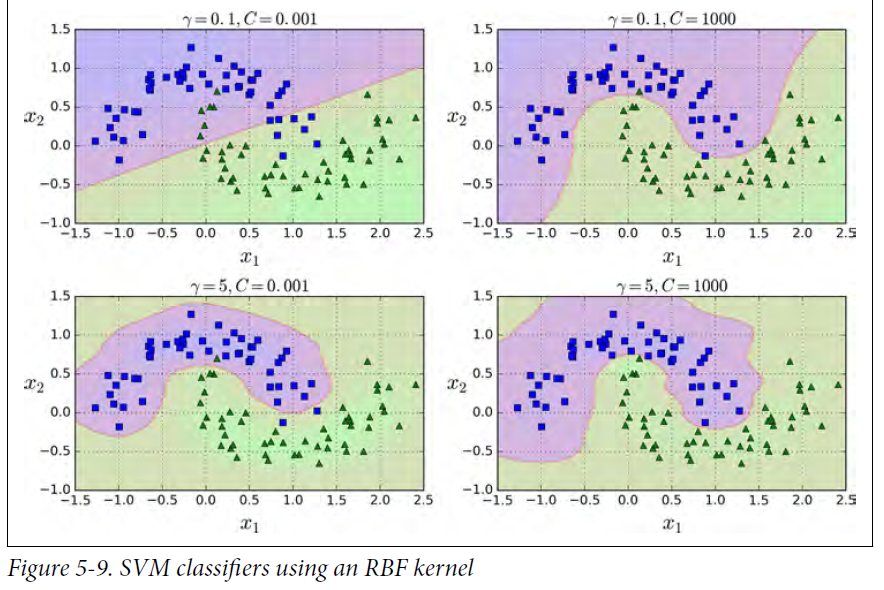

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

In [ ]:
svm_clfs

[Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svm_clf',
                  SVC(C=0.001, break_ties=False, cache_size=200,
                      class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=0.1,
                      kernel='rbf', max_iter=-1, probability=False,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False), Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svm_clf',
                  SVC(C=1000, break_ties=False, cache_size=200,
                      class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=0.1,
                      kernel='rbf', max_iter=-1, probability=False,
                      random_state=N

## How to choose kernel?

In [ ]:
# Default one is inear kernel
# LinearSVC is faster ethan SVC(kernel = linear)
# If traing set is very large or has lots of features

In [ ]:
# if training set is small try Gaussian

In [ ]:
# try cross validation and grid search for best hyper parameters


# SVM Regression

SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

The width of the street is controlled by a **hyperparameter** **ϵ**.


In [ ]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

# **SVM can be used for outlier detection**

# Questions

## LinearSVC Vs SVC Vs SGDClassifier

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

## Question : train an SVM classifier on the MNIST dataset. 

In [22]:
# Import datasets
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

### Using simple LinearSVC

In [ ]:
#  linear SVM classifier. 
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

### Scaling data and then trying LinearSVC

In [ ]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

### Using Kernel

In [ ]:
# using kernel

svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])


y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

### Using  RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

In [ ]:
rnd_search_cv.best_estimator_
rnd_search_cv.best_score_

rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

#### Testing it on test data

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

apparently the model is overfitting slightly. It's tempting to tweak the hyperparameters a bit more (e.g. decreasing C and/or gamma), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters C=5 and gamma=0.005 yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well.

## Question: Train SVR on housing dataset




#### Fetch data

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Simple linear SVR

In [ ]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

np.sqrt(mse)

In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $10,000. Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for C and gamma:

#### Using SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

Looks much better than the linear model. Let's select this model and evaluate it on the test set:

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)